In [3]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import tensorflow as tf
from tensorflow.keras.optimizers import Adam, RMSprop, SGD


In [4]:
(X_train, y_train), (X_test, y_test) = load_data()
y_test = tf.keras.utils.to_categorical(y_test, 10)
y_train = tf.keras.utils.to_categorical(y_train, 10)

In [5]:
n_train_size = X_train.shape[0]

In [6]:
print('-'*50)
print('Training data X shape: {}'.format(X_train.shape))
print('Training data y shape: {}'.format(y_train.shape))
print('-'*50)
print('Test data X shape: {}'.format(X_test.shape))
print('Test data y shape: {}'.format(y_test.shape))

--------------------------------------------------
Training data X shape: (60000, 28, 28)
Training data y shape: (60000, 10)
--------------------------------------------------
Test data X shape: (10000, 28, 28)
Test data y shape: (10000, 10)


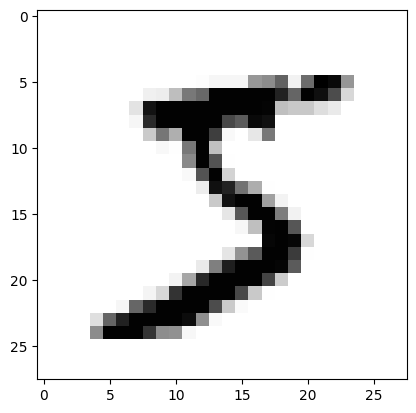

In [7]:
i_image = 0
plt.imshow(X_train[i_image,:,:], cmap = 'Greys')
plt.show()

In [8]:
# Scaling
X_train = X_train/255
X_test = X_test/255

In [9]:
#Reshape
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28,28, 1)

In [10]:
print(X_train.shape)

(60000, 28, 28, 1)


In [11]:
# import numpy as np
# import tensorflow as tf

# # Giả định y_train và y_test đã được định nghĩa từ trước,
# # ví dụ từ quá trình tách dữ liệu (train_test_split) và là các số nguyên
# # n_train_size cũng cần được định nghĩa, thường là số lượng mẫu trong y_train ban đầu.

# y = np.concatenate((y_train, y_test), axis=0)
# y = tf.keras.utils.to_categorical(y, 10)
# y_train = y[:,n_train_size:,]
# y_test = y[-n_train_size:,] # Chú ý: Có vẻ có một lỗi logic nhỏ ở đây, sẽ giải thích bên dưới

In [12]:
print(y_train.shape)

(60000, 10)


In [14]:
my_model = Sequential()
drop_prob = 0.5
my_model.add(Conv2D(input_shape = (28,28,1), filters = 32, kernel_size = (5,5), padding = 'same', activation = 'relu'))
my_model.add(MaxPooling2D(pool_size = 2))
my_model.add(Conv2D( filters = 64, kernel_size = (5,5), padding = 'same', activation = 'relu'))
my_model.add(MaxPooling2D(pool_size = 2))
my_model.add(Flatten())
my_model.add(Dense(units = 1024, activation = 'relu'))
my_model.add(Dropout(rate = drop_prob))
my_model.add(Dense(units = 10, activation = 'softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
my_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     3,212,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,274,634 (12.49 MB)

 Trainable params: 3,274,634 (12.49 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

# Xác định các siêu tham số
n_epochs = 10
batch_size = 200
learn_rate = 0.001

# Khởi tạo Optimizer (Adam)
# Lưu ý: Trong các phiên bản TensorFlow/Keras gần đây, tham số là 'learning_rate' thay vì 'lr'
# Dù hình ảnh ghi 'lr', nhưng để tương thích với phiên bản mới, ta dùng 'learning_rate'
my_optimizer = Adam(learning_rate = learn_rate)

# Biên dịch mô hình
my_model.compile(loss = "categorical_crossentropy", optimizer = my_optimizer, metrics=["accuracy"])

In [17]:
# Huấn luyện mô hình
my_summary = my_model.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size, validation_split=0.2, verbose=1)

Epoch 1/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.8436 - loss: 0.4954 - val_accuracy: 0.9804 - val_loss: 0.0673
Epoch 2/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9796 - loss: 0.0623 - val_accuracy: 0.9865 - val_loss: 0.0437
Epoch 3/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9872 - loss: 0.0405 - val_accuracy: 0.9890 - val_loss: 0.0397
Epoch 4/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9914 - loss: 0.0276 - val_accuracy: 0.9900 - val_loss: 0.0349
Epoch 5/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9925 - loss: 0.0218 - val_accuracy: 0.9901 - val_loss: 0.0348
Epoch 6/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9954 - loss: 0.0139 - val_accuracy: 0.9913 - val_loss: 0.0292
Epoch 7/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9953 - loss: 0.0139 - val_accuracy: 0.9897 - val_loss: 0.0377
Epoch 8/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9956 - loss: 0.0131 - val_accuracy: 

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets.cifar10 import load_data # Chú ý: Đây là CIFAR-10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
warnings.filterwarnings('ignore')
%matplotlib inline

In [28]:
(X_train, y_train), (X_test, y_test) = load_data()
y_test = tf.keras.utils.to_categorical(y_test, 10)
y_train = tf.keras.utils.to_categorical(y_train, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [29]:
print('-'*50)
print('Training data X shape: {}'.format(X_train.shape))
print('Training data y shape: {}'.format(y_train.shape))
print('-'*50)
print('Test data X shape: {}'.format(X_test.shape))
print('Test data y shape: {}'.format(y_test.shape))

--------------------------------------------------
Training data X shape: (50000, 32, 32, 3)
Training data y shape: (50000, 10)
--------------------------------------------------
Test data X shape: (10000, 32, 32, 3)
Test data y shape: (10000, 10)


In [30]:
# Scaling
X_train = X_train/255
X_test = X_test/255

In [31]:
#Reshape
X_train = X_train.reshape(-1, 32, 32, 3)
X_test = X_test.reshape(-1, 32,32,3)

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

drop_prob = 0.7
my_model = Sequential()

# 1st convolution + pooling
my_model.add(Conv2D(input_shape = (32,32,3), filters=32, kernel_size = (5,5), padding = 'same', activation="relu"))
my_model.add(MaxPooling2D(pool_size=2))

# 2nd convolution + pooling
my_model.add(Conv2D(filters=64, kernel_size = (5,5), padding='same', activation="relu"))
my_model.add(MaxPooling2D(pool_size=2))

# Flattened fully connected layer
my_model.add(Flatten())
my_model.add(Dense(units = 1024, activation="relu"))

# Apply dropout
my_model.add(Dropout(rate=drop_prob))

# Output layer
my_model.add(Dense(units = 10, activation="softmax"))

my_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1024)           │     4,195,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,259,274 (16.25 MB)

 Trainable params: 4,259,274 (16.25 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

# Xác định các siêu tham số
n_epochs = 10
batch_size = 200
learn_rate = 0.001

# Khởi tạo Optimizer (Adam)
# Lưu ý: Trong các phiên bản TensorFlow/Keras gần đây, tham số là 'learning_rate' thay vì 'lr'
# Dù hình ảnh ghi 'lr', nhưng để tương thích với phiên bản mới, ta dùng 'learning_rate'
my_optimizer = Adam(learning_rate = learn_rate)

# Biên dịch mô hình
my_model.compile(loss = "categorical_crossentropy", optimizer = my_optimizer, metrics=["accuracy"])

In [35]:
# Huấn luyện mô hình
my_summary = my_model.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size, validation_split=0.2, verbose=1)

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.2955 - loss: 1.9247 - val_accuracy: 0.5173 - val_loss: 1.3506
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.5121 - loss: 1.3503 - val_accuracy: 0.6009 - val_loss: 1.1613
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.5936 - loss: 1.1515 - val_accuracy: 0.6437 - val_loss: 1.0195
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.6348 - loss: 1.0321 - val_accuracy: 0.6548 - val_loss: 0.9837
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.6679 - loss: 0.9504 - val_accuracy: 0.6796 - val_loss: 0.9257
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.6886 - loss: 0.8901 - val_accuracy: 0.6882 - val_loss: 0.8944
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7145 - loss: 0.8204 - val_accuracy: 0.6947 - val_loss: 0.8845
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.7355 - loss: 0.7552 - val_accu

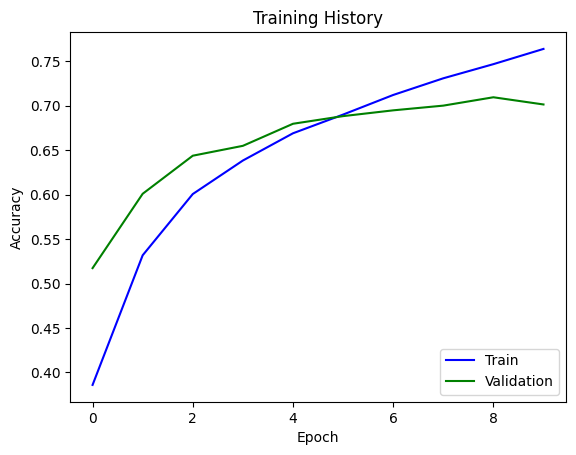

In [36]:
import matplotlib.pyplot as plt

# Số bước bỏ qua ở đầu biểu đồ (ở đây là 0, tức là hiển thị từ bước đầu tiên)
n_skip = 0

# Vẽ biểu đồ Accuracy của tập huấn luyện
plt.plot(my_summary.history['accuracy'][n_skip:], c="b")

# Vẽ biểu đồ Accuracy của tập validation
plt.plot(my_summary.history['val_accuracy'][n_skip:], c="g")

# Đặt tiêu đề cho biểu đồ
plt.title('Training History')

# Đặt nhãn cho trục y (Lưu ý: "Accruacy" trong hình có thể là lỗi chính tả, thường là "Accuracy")
plt.ylabel('Accuracy')

# Đặt nhãn cho trục x
plt.xlabel('Epoch')

# Hiển thị chú giải (legend) để phân biệt đường Train và Validation
plt.legend(['Train', 'Validation'], loc='lower right')

# Hiển thị biểu đồ
plt.show()